<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Chronic Kidney Disease Analysis: Unveiling the Hidden Patterns</b></div>

Chronic Kidney Disease (CKD) affects millions worldwide, yet many remain undiagnosed until it's too late. With the power of data, we can uncover patterns and potentially predict the onset of CKD, offering a lifeline to those at risk. In this notebook, we'll dive deep into a dataset of kidney disease patients, exploring the intricacies of the data and building a predictive model to identify CKD cases. If you find this analysis insightful, consider upvoting it.

## Table of Contents
1. [Data Overview](#data-overview)
2. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Model Building and Evaluation](#model-building-and-evaluation)
6. [Discussion and Future Work](#discussion-and-future-work)

## 1. Data Overview
Let's begin by loading the dataset and taking a quick look at its structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = '/kaggle/input/ckdisease/kidney_disease.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## 2. Data Cleaning and Preprocessing
Data cleaning is a crucial step in any data analysis process. Let's handle missing values, convert data types, and prepare the data for analysis.

In [2]:
# Check for missing values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [3]:
# Convert relevant columns to numeric
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Fill missing values with median for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

## 3. Exploratory Data Analysis
Let's explore the dataset to understand the distribution of features and their relationships.

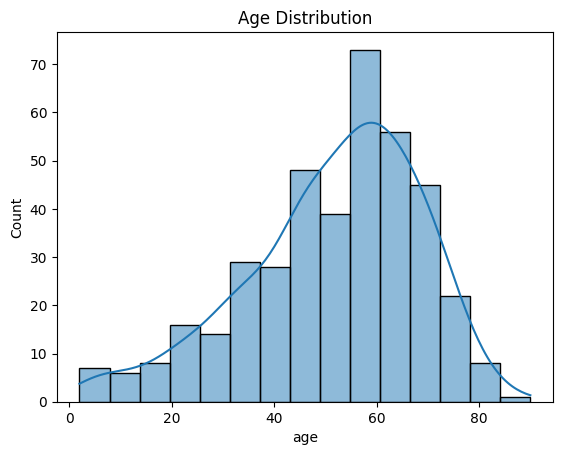

In [4]:
# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

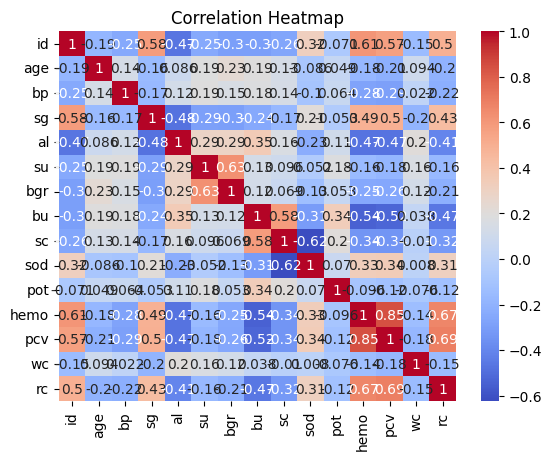

In [5]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

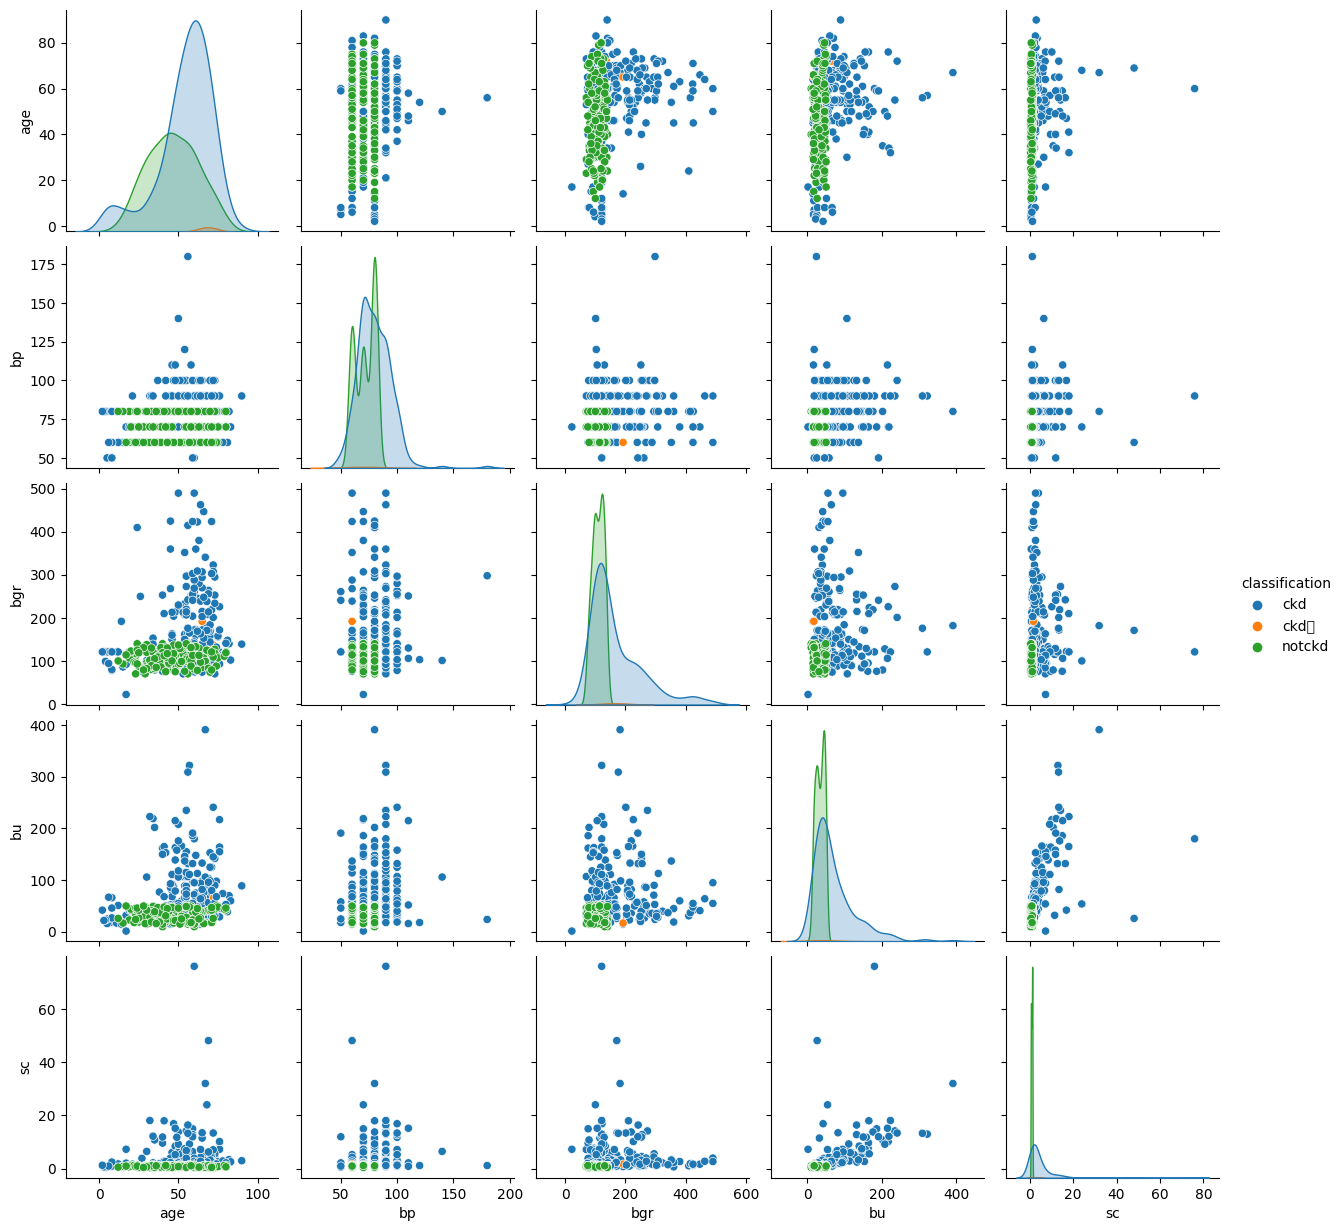

In [6]:
# Pair plot of selected features
sns.pairplot(df, vars=['age', 'bp', 'bgr', 'bu', 'sc'], hue='classification')
plt.show()

## 4. Feature Engineering
Feature engineering can enhance the predictive power of our model. Let's create some new features based on domain knowledge.

In [7]:
# Create a new feature: blood pressure category
df['bp_category'] = pd.cut(df['bp'], bins=[0, 80, 120, np.inf], labels=['Low', 'Normal', 'High'])

## 5. Model Building and Evaluation
We'll build a predictive model to classify CKD cases and evaluate its performance.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



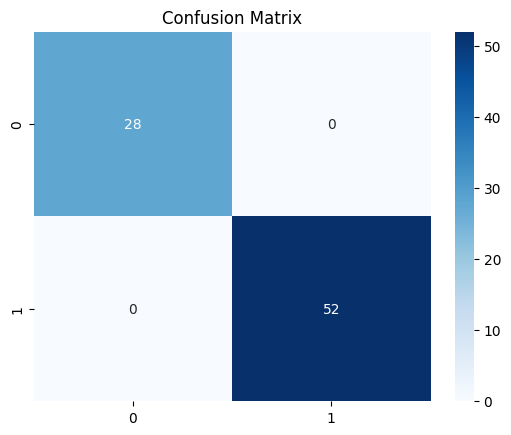

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Prepare the data
X = df.drop(columns=['id', 'classification'])
y = df['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

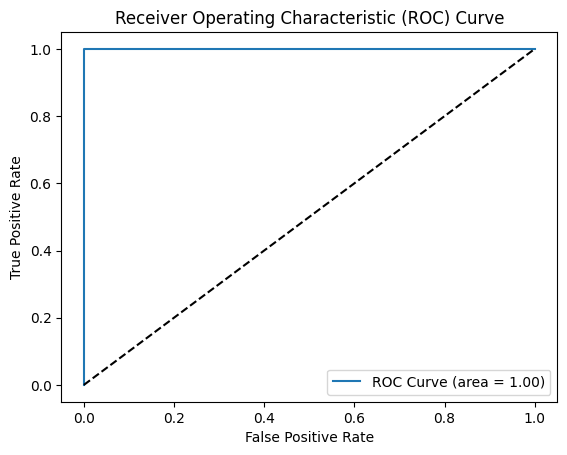

In [9]:
# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 6. Discussion and Future Work
In this notebook, we explored a dataset on chronic kidney disease, performed data cleaning, and built a predictive model using a Random Forest Classifier. The model showed promising results, but there's always room for improvement. Future work could involve hyperparameter tuning, exploring other machine learning algorithms, and incorporating additional data sources to enhance the model's accuracy. If you found this notebook helpful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)